In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


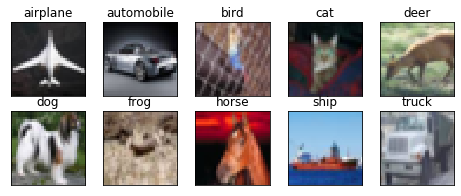

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Base Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 20s 50ms/step - loss: 1.8743 - acc: 0.2764 - val_loss: 1.4875 - val_acc: 0.4434
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3857 - acc: 0.4951 - val_loss: 1.1644 - val_acc: 0.5806
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1479 - acc: 0.5929 - val_loss: 0.9920 - val_acc: 0.6496
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0137 - acc: 0.6443 - val_loss: 0.8924 - val_acc: 0.6893
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8975 - acc: 0.6905 - val_loss: 0.8277 - val_acc: 0.7084
Epoch 6/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8323 - acc: 0.7160 - val_loss: 0.7509 - val_acc: 0.7419
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7692 - acc: 0.7375 - val_loss: 0.7298 - val_acc: 0.7494
Epoch 8/50
390/390 [==============================] - 9s 22m

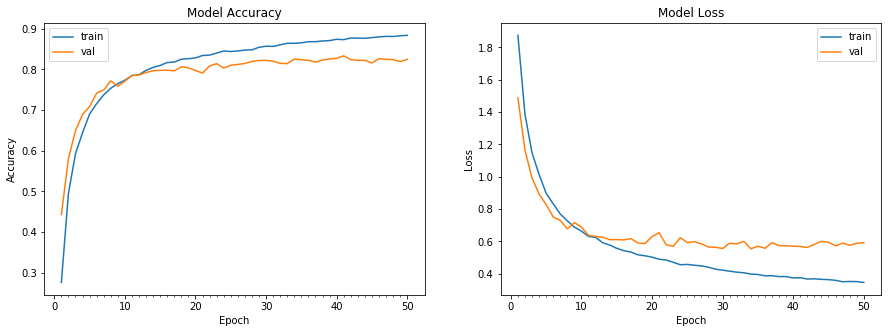

Accuracy on test data is: 82.48


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Depthwise Separable model

In [0]:
from keras.layers import SeparableConv2D, DepthwiseConv2D, AveragePooling2D

In [0]:
model = Sequential()

#layer                                                                      #ouput                #receptive feild
model.add(SeparableConv2D(64, (3, 3), input_shape=(32, 32, 3),activation='relu',use_bias=False))     #30     #3
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3),activation='relu',use_bias=False))      #28                    #5
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3),activation='relu',use_bias=False))      #26                    #7
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(AveragePooling2D((2,2)))                                            #13                    #8
model.add(Convolution2D(64,(1,1),activation='relu',use_bias=False))           #13                    #8
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(SeparableConv2D(64, (3, 3),activation='relu',use_bias=False))       #11                    #12
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3),activation='relu',use_bias=False))      #9                     #16
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3),activation='relu',use_bias=False))      #7                     #20
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(64,(1,1),activation='relu',use_bias=False))           #7                     #20
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(SeparableConv2D(64, (3, 3),activation='relu',use_bias=False))       #5                     #24
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SeparableConv2D(64, (3, 3),activation='relu',use_bias=False))       #3                     #28
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(10,(1,1),activation='relu',use_bias=False))           #3                     #28
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(SeparableConv2D(10, (3, 3),activation='softmax'))                   #1                     #32

model.add(Flatten())

# model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 30, 30, 64)        219       
_________________________________________________________________
batch_normalization_23 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_23 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 28, 28, 128)       8768      
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
dropout_24 (Dropout)         (None, 28, 28, 128)       0         
_________________________________________________________________
separable_conv2d_21 (Separab (None, 26, 26, 128)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.03 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390)`
  if sys.path[0] == '':




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.03.
390/390 [==============================] - 69s 176ms/step - loss: 1.7860 - acc: 0.3327 - val_loss: 3.8963 - val_acc: 0.3373
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0227445034.
390/390 [==============================] - 60s 154ms/step - loss: 1.4224 - acc: 0.4863 - val_loss: 1.9521 - val_acc: 0.4769
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0183150183.
390/390 [==============================] - 60s 154ms/step - loss: 1.2515 - acc: 0.5526 - val_loss: 1.4627 - val_acc: 0.5324
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0153295861.
390/390 [==============================] - 60s 154ms/step - loss: 1.1218 - acc: 0.5996 - val_loss: 1.3430 - val_acc: 0.5746
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0131810193.
390/390 [==============================] - 60s 155ms/step - loss: 1.0216 - acc: 

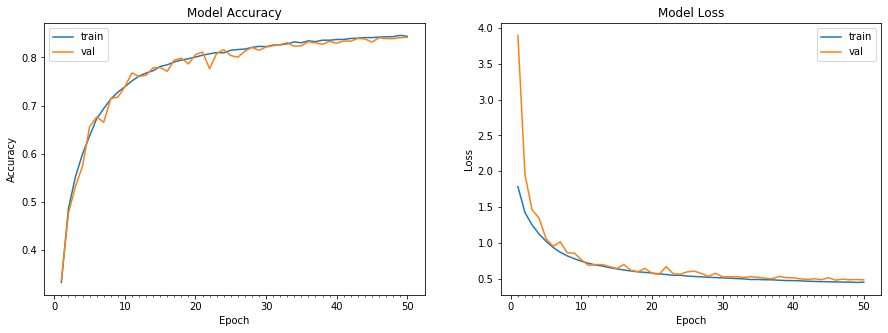

Accuracy on test data is: 84.17


In [15]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))